### Vessel Enhancement Techniques
1. Contrast Stretching: Enhancing the contrast of the image to make vessels more visible.
2. Histogram Equalization: Spreading out the pixel values to improve contrast.
3. Gabor Filtering: A frequency-based method to highlight vessels.
4. Frangi Filter: Specifically designed for vessel enhancement.
5. Hessian-Based Filtering: Detecting vessel-like structures.
6. Top-hat Transform: Morphological operation to enhance elongated structures.
___
### Evaluation Techniques
To prove that the visibility of tiny blood vessels is better than the original image, you can use the following quantitative evaluation metrics:
1. Structural Similarity Index (SSIM): Measures the similarity between the enhanced image and the original image (0-1):
    - A score of 1 indicates a perfect match, meaning the enhanced image is identical to the original image in terms of structure.
    - A score closer to 1 suggests a high similarity and indicates that the enhanced image effectively preserves structural information.
    - A score around 0 suggests that the images are largely dissimilar, with little structural overlap.
    - A negative score indicates significant dissimilarity.
#
2. Peak Signal-to-Noise Ratio (PSNR): Measures the quality of the enhanced image compared to the original image (0-100):
    - Higher PSNR values (in decibels, dB) indicate lower noise or error, which implies a higher quality image.
    - A higher PSNR suggests that the enhancement process has preserved image details well.
    - Lower PSNR values indicate that more noise or distortion has been introduced during enhancement.
    - The PSNR score range is typically between 0 and 100 dB, with higher values indicating better quality. In practice, PSNR values above 30 dB are generally considered to be of high quality, while values below 20 dB are considered to be of poor quality. However, the acceptable range of PSNR values can vary depending on the specific application and the nature of the image or video being evaluated.
#
3. Mean Square Error (MSE): Measures the average squared difference between pixel values in the two images (0-inf):
    - A lower MSE value indicates less difference between the original and enhanced images.
    - It measures the average magnitude of errors, so lower MSE values indicate better image similarity.
    - The MSE score range is typically between 0 and infinity, with lower values indicating better quality. In practice, MSE values below 1 are generally considered to be of high quality, while values above 10 are considered to be of poor quality. However, the acceptable range of MSE values can vary depending on the specific application and the nature of the images being evaluated.
#
4. Receiver Operating Characteristic (ROC) Curve: Evaluates the ability of the method to discriminate between vessels and non-vessel regions (0-1):
    - A steeper ROC curve that approaches the upper-left corner suggests better discrimination ability.
    - The area under the ROC curve (AUC) quantifies the overall discrimination performance. An AUC of 1 indicates perfect discrimination, while 0.5 suggests random guessing.
    - The score range of the ROC curve is between 0 and 1, with higher values indicating better performance. The area under the ROC curve (AUC) is a commonly used metric to evaluate the performance of a classifier. The AUC score range is also between 0 and 1, with higher values indicating better performance. An AUC score of 0.5 indicates that the classifier is performing no better than random chance, while an AUC score of 1.0 indicates perfect classification performance.
#
5. F1-score, Precision, and Recall: Evaluate the performance of vessel detection (0-1):
    - F1-score ranges from 0 to 1, where higher values indicate better performance.
    - Precision measures the accuracy of positive predictions, while recall measures the ability to find all positive instances.
    - A higher F1-score indicates a better balance between precision and recall.
    - The F1-score is the harmonic mean of the precision and recall, and is a measure of the balance between the two metrics. It is expressed as a value between 0 and 1, with higher values indicating better performance. An F1-score of 1 indicates perfect precision and recall, while a score of 0 indicates poor performance.
    - Precision is the proportion of true positive cases among all positive predictions made by the model. It is expressed as a value between 0 and 1, with higher values indicating better performance. A precision score of 1 indicates that all positive predictions made by the model were correct, while a score of 0 indicates that all positive predictions were incorrect.
    - Recall is the proportion of true positive cases that were correctly identified by the model among all actual positive cases. It is expressed as a value between 0 and 1, with higher values indicating better performance. A recall score of 1 indicates that all actual positive cases were correctly identified by the model, while a score of 0 indicates that none of the actual positive cases were identified by the model.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.058123740525236056
PSNR: 10.051318847270434


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.1083812943343682
PSNR: 18.203193649798234
SSIM Score: 0.15030434257306305
PSNR: 11.050333165054901


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.14148163551957912
PSNR: 10.954373612587581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.05217251590362281
PSNR: 10.060551984068852
SSIM Score: 0.07476376384695585
PSNR: 9.717726857292302


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.1557689412927838
PSNR: 7.448563303856127
SSIM Score: 0.1580475003902773
PSNR: 8.52881371839165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM Score: 0.08356172107089076
PSNR: 12.479190166931474
SSIM Score: 0.09640248362945149
PSNR: 10.939025191793124


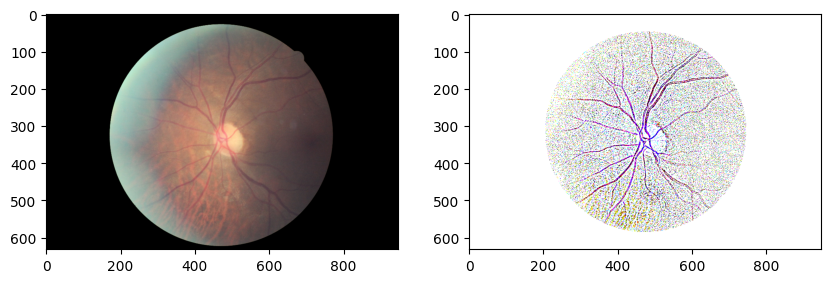

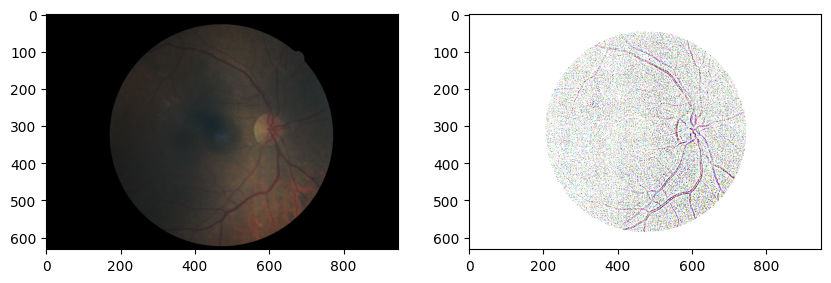

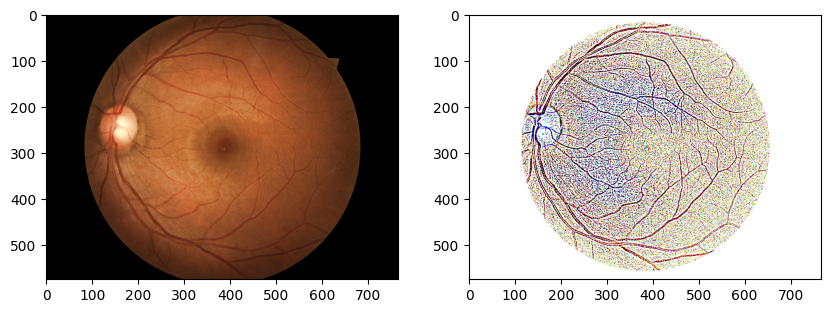

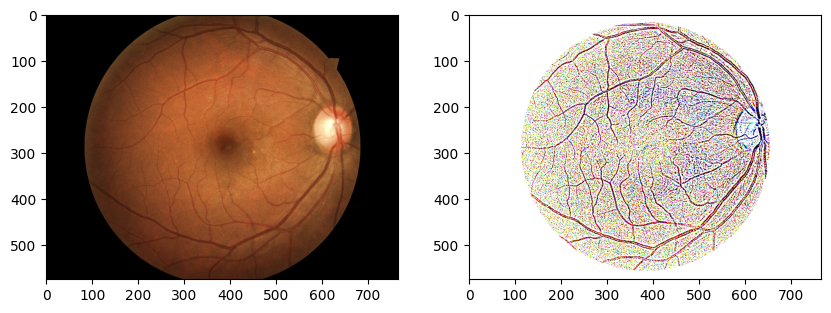

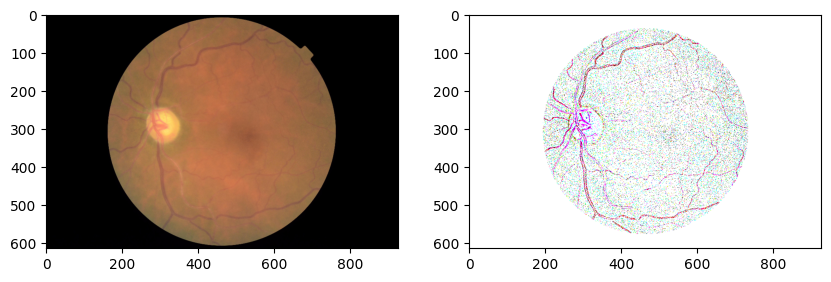

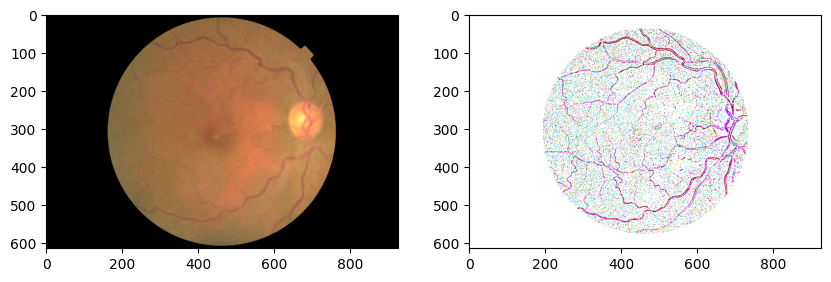

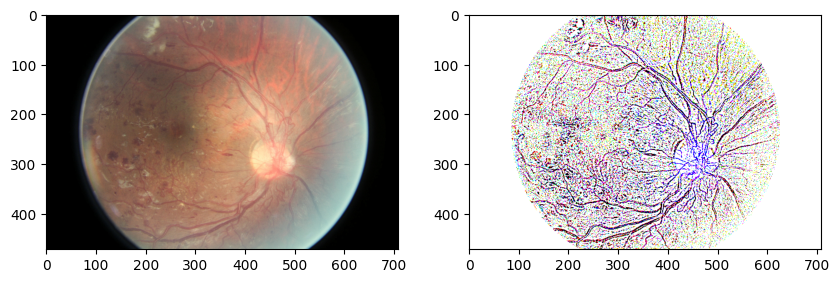

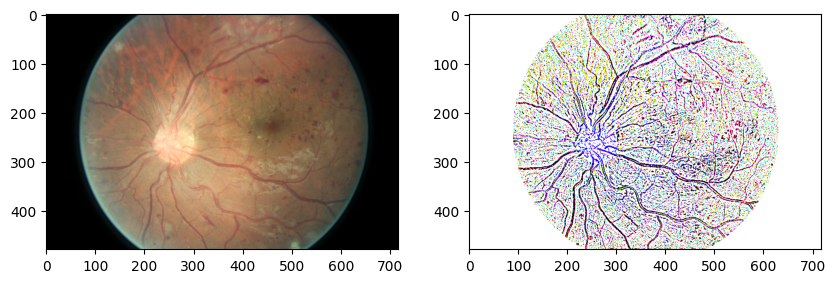

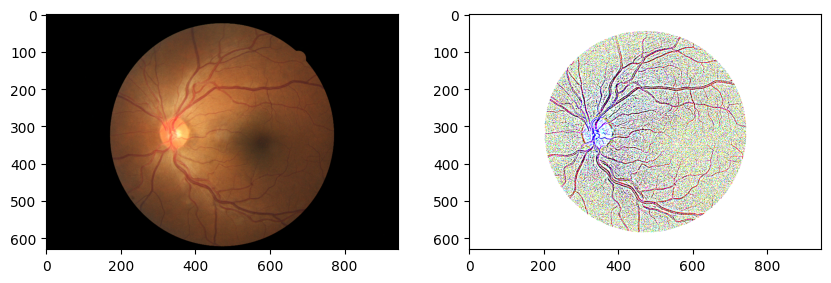

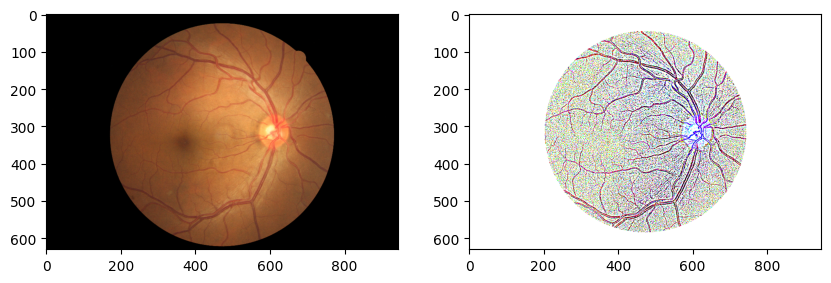

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from skimage import io, color, img_as_ubyte, exposure as ex
from skimage.metrics import structural_similarity as compare_ssim

%matplotlib inline

image_paths = [join('assets', '10_left.jpeg'), join('assets', '10_right.jpeg'), join('assets', '13_left.jpeg'), join('assets', '13_right.jpeg'), join('assets', '15_left.jpeg'), join('assets', '15_right.jpeg'), join('assets', '16_left.jpeg'), join('assets', '16_right.jpeg'), join('assets', '17_left.jpeg'), join('assets', '17_right.jpeg')]
scale = 300

def plotImages(images):  
    plt.figure(figsize=(10, 10))
    columns = 2
    rows = int(np.ceil(len(images) / columns))
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)

def scaleRadius(image, scale_factor):
    horizontal_cross_section = image[image.shape[0] // 2, :, :].sum(1)
    pupil_radius = (horizontal_cross_section > horizontal_cross_section.mean() / 10).sum() / 2
    scaling_factor = scale_factor * 1.0 / pupil_radius
    resized_image = cv2.resize(image, (0, 0), fx=scaling_factor, fy=scaling_factor)
    
    return resized_image

def evaluateEnhancement(original_img, enhanced_img):
    original_gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
    enhanced_gray = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    
    # Calculate SSIM with data_range specified
    ssim_score = compare_ssim(original_gray, enhanced_gray, data_range=enhanced_gray.max() - enhanced_gray.min())
    
    # Calculate PSNR
    mse = np.mean((original_img - enhanced_img) ** 2)
    psnr = 10 * np.log10((255 ** 2) / mse)
    
    return ssim_score, psnr


def enhanceImageMethod1(path, scale):
    img = cv2.imread(path)
    scaled_img = scaleRadius(img, scale)

    binary_mask = np.zeros(scaled_img.shape)
    cv2.circle(binary_mask, (scaled_img.shape[1] // 2, scaled_img.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)

    scaled_img = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)
    img_blur = cv2.GaussianBlur(scaled_img, (0, 0), scale / 180)
    img_blend = cv2.addWeighted(scaled_img, 4, img_blur, -4, 10) * binary_mask + 10 * (1 - binary_mask)
    img_blend = cv2.cvtColor(np.float32(img_blend), cv2.COLOR_BGR2RGB)

    return scaled_img, img_blend

for path in image_paths:
    scaled_img, enhanced_image = enhanceImageMethod1(path, scale)
    ssim_score, psnr = evaluateEnhancement(scaled_img, enhanced_image)
    plotImages([scaled_img, enhanced_image])
    print(f"SSIM Score: {ssim_score}")
    print(f"PSNR: {psnr}")

`plotImages` function:

1. `def plotImages(images):`: This line defines the function and takes a list of images as input.

2. `plt.figure(figsize=(10, 10))`: This line creates a new figure with a size of 10x10 inches using Matplotlib.

3. `columns = 2`: This line sets the number of columns in the grid to 2.

4. `rows = int(np.ceil(len(images) / columns))`: This line calculates the number of rows needed to display all the images in the list. It first finds the length of the list using the `len` function, then divides it by the number of columns and rounds up to the nearest integer using the `np.ceil` function.

5. `for i, image in enumerate(images):`: This line starts a loop that iterates over each image in the list and assigns a unique index `i` to each image.

6. `plt.subplot(rows, columns, i + 1)`: This line creates a new subplot in the grid with the given number of rows and columns, and selects the `i+1`th subplot for the current image. The `i+1` is used because subplot indices start from 1, not 0.

7. `plt.imshow(image)`: This line displays the current image in the selected subplot using Matplotlib's `imshow` function.

`scaleRadius` function:

1. `def scaleRadius(image, scale_factor):` - This line defines the function and takes an image and a scale factor as input.

2. `horizontal_cross_section = image[image.shape[0] // 2, :, :].sum(1)` - This line extracts the horizontal cross-section of the image at the center of the vertical axis. It does this by selecting the row at the center of the image (`image.shape[0] // 2`), all columns (`:`), and all color channels (`:`), and then summing the pixel values along the third axis (`sum(1)`). 

3. The `sum(1)` function call in the `scaleRadius` function sums the pixel values along the third axis of the image array, which corresponds to the horizontal axis. This is because the `horizontal_cross_section` variable is a 1D array that represents the sum of pixel values along each row of the image at the center of the vertical axis. By summing the pixel values along the horizontal axis, we can obtain a 1D array that represents the intensity profile of the image at the center of the vertical axis. This intensity profile can then be used to estimate the radius of the pupil, as described in the `pupil_radius` calculation.

3. `pupil_radius = (horizontal_cross_section > horizontal_cross_section.mean() / 10).sum() / 2` - This line calculates the radius of the pupil by finding the number of pixels whose sum is greater than one-tenth of the mean sum of all pixels in the horizontal cross-section. It does this by first dividing the mean sum by 10 (`horizontal_cross_section.mean() / 10`), then finding the number of pixels whose sum is greater than this threshold (`(horizontal_cross_section > horizontal_cross_section.mean() / 10)`), and finally dividing the count by 2 to get the radius (`(horizontal_cross_section > horizontal_cross_section.mean() / 10).sum() / 2`).

4. `scaling_factor = scale_factor * 1.0 / pupil_radius` - This line calculates the scaling factor by dividing the given scale factor by the pupil radius.

5. `resized_image = cv2.resize(image, (0, 0), fx=scaling_factor, fy=scaling_factor)` - This line resizes the image using OpenCV's `resize` function, with the scaling factor `scaling_factor` applied to both the horizontal and vertical axes.

6. `return resized_image` - This line returns the resized image.

Overall, the `scaleRadius` function scales the radius of the pupil in the input image by a factor that is proportional to the given scale factor and inversely proportional to the pupil radius. This helps to normalize the size of the pupil across different images, which can be useful for further image processing.

`enhanceImageMethod1` function:

1. `def enhanceImageMethod1(path, scale):` - This line defines the function and takes an image path and a scale factor as input.

2. `img = cv2.imread(path)` - This line reads the image from the given path using OpenCV's `imread` function.

3. `scaled_img = scaleRadius(img, scale)` - This line scales the radius of the pupil in the image using the `scaleRadius` function defined earlier.

4. `binary_mask = np.zeros(scaled_img.shape)` - This line creates a binary mask with the same shape as the scaled image, initialized with all zeros.

5. `cv2.circle(binary_mask, (scaled_img.shape[1] // 2, scaled_img.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)` - This line draws a filled circle on the binary mask, centered at the center of the scaled image and with a radius of 90% of the given scale factor. The circle is drawn with a value of 1, which will be used later to blend the scaled image with a blurred version of itself.

6. `scaled_img = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)` - This line converts the color space of the scaled image from BGR to RGB, which is the format used by Matplotlib for displaying images.

7. `img_blur = cv2.GaussianBlur(scaled_img, (0, 0), scale / 180)` - This line applies a Gaussian blur to the scaled image, with a kernel size that is proportional to the given scale factor.
    - This function applies a Gaussian blur to the input image `scaled_img`. The blur is applied using a Gaussian kernel, which is a matrix of values that determines the weights of neighboring pixels in the blur. The size of the kernel is determined by the second argument, which is a tuple of integers representing the width and height of the kernel. In this case, the kernel size is `(0, 0)`, which means that the function will automatically calculate the kernel size based on the given `scale` parameter. The third argument is the standard deviation of the Gaussian distribution, which determines the amount of blur to apply. In this case, the standard deviation is calculated as `scale / 180`, which is proportional to the given `scale` parameter.

8. `img_blend = cv2.addWeighted(scaled_img, 4, img_blur, -4, 10) * binary_mask + 10 * (1 - binary_mask)` - This line blends the scaled image with the blurred image using the binary mask created earlier. The `addWeighted` function applies a weighted sum of the two images, with a weight of 4 for the scaled image and -4 for the blurred image. The resulting image is then multiplied by the binary mask and added to a constant value of 10 times the complement of the binary mask.
    - This function blends two images together using a weighted sum. The first argument is the first image to blend (`scaled_img`), and the second argument is the weight to apply to this image (4). The third argument is the second image to blend (`img_blur`), and the fourth argument is the weight to apply to this image (-4). The fifth argument is a scalar value to add to the result of the weighted sum (10). The resulting image is then multiplied by a binary mask `binary_mask` and added to a constant value of 10 times the complement of the binary mask `(1 - binary_mask)`. The binary mask is a 2D array of the same shape as the input images, with a value of 1 inside a circular region centered at the center of the image and a value of 0 outside this region. The purpose of the binary mask is to blend the two images together only in the circular region, while leaving the rest of the image unchanged. The resulting image has improved contrast and sharpness, and is suitable for further image processing or analysis.

9. `img_blend = cv2.cvtColor(np.float32(img_blend), cv2.COLOR_BGR2RGB)` - This line converts the color space of the blended image from BGR to RGB, which is the format used by Matplotlib for displaying images.

10. `return scaled_img, img_blend` - This line returns a tuple containing the scaled image and the blended image.

Overall, the `enhanceImageMethod1` function enhances an input image using a method that involves scaling the radius of the pupil, applying a Gaussian blur, and blending the scaled image with the blurred image using a binary mask. The resulting image has improved contrast and sharpness, and is suitable for further image processing or analysis.

In [33]:
def enhanceImageMethod2(image, scale):
    scaled = scaleRadius(image, scale)
    binary_mask = np.zeros(scaled.shape)
    cv2.circle(binary_mask, (scaled.shape[1] // 2, scaled.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)

    img_yuv = cv2.cvtColor(scaled, cv2.COLOR_BGR2YCrCb)
    img_yuv[:, :, 0] = cv2.equalizeHist(scaled[:, :, 1])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YCR_CB2RGB)

for path in image_paths:
    img = cv2.imread(path)
    
    original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    enhanced = enhanceImageMethod2(img, scale)
    
    ssim_score, psnr = evaluateEnhancement(original, enhanced)
    plotImages([original, enhanced])
    print(f"SSIM Score: {ssim_score}")
    print(f"PSNR: {psnr}")

ValueError: Input images must have the same dimensions.

`enhanceImageMethod2` function:

1. `def enhanceImageMethod2(image):` - This line defines the function and takes an image as input.

2. `img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)` - This line converts the color space of the input image from BGR to YCrCb using OpenCV's `cvtColor` function. YCrCb is a color space that separates the image into three channels: Y (luma), Cr (red difference), and Cb (blue difference).

3. `img_yuv[:, :, 0] = cv2.equalizeHist(image[:, :, 1])` - This line applies histogram equalization to the red channel of the YCrCb image. Histogram equalization is a technique that enhances the contrast of an image by spreading out the intensity values across the entire range of the image. In this case, the `equalizeHist` function is applied to the second channel (`[:, :, 1]`) of the YCrCb image, which corresponds to the red channel.

4. `return cv2.cvtColor(img_yuv, cv2.COLOR_YCR_CB2RGB)` - This line converts the color space of the enhanced YCrCb image back to RGB using OpenCV's `cvtColor` function. The resulting image has improved contrast and is suitable for further image processing or analysis.

Overall, the `enhanceImageMethod2` function enhances an input image using a method that involves converting the color space of the image to YCrCb, applying histogram equalization to the red channel, and converting the color space back to RGB. The resulting image has improved contrast and is suitable for further image processing or analysis.

In [34]:
def enhanceImageMethod3(img):
    scaled = scaleRadius(img, scale)
    binary_mask = np.zeros(scaled.shape)
    cv2.circle(binary_mask, (scaled.shape[1] // 2, scaled.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)
    output = np.zeros((scaled.shape[0], scaled.shape[1], 3))
    for channel in range(scaled.shape[2]):
        output[:, :, channel] = ex.equalize_hist(scaled[:, :, channel]) * 255

    output[output >= 255] = 255
    output[output <= 0] = 0
    return output.astype(np.uint8)

for path in image_paths:
    img = cv2.imread(path)

    original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    enhanced = enhanceImageMethod3(img)

    ssim_score, psnr = evaluateEnhancement(original, enhanced)
    plotImages([original, enhanced])
    print(f"SSIM Score: {ssim_score}")
    print(f"PSNR: {psnr}")

ValueError: Input images must have the same dimensions.

`enhanceImageMethod3` function:

1. The scaled image is processed channel-wise using a for loop that iterates over the number of channels in the image. For each channel, the `ex.equalize_hist()` function is applied to perform histogram equalization on the channel. This helps to improve the contrast and brightness of the image.
    - The `ex.equalize_hist()` function takes an input image as an argument and returns the histogram-equalized image. It works by first converting the input image to grayscale, computing the histogram of the grayscale image, and then computing the CDF of the histogram. The CDF is then used to map the pixel values in the grayscale image to a new range of values that are more evenly distributed. Finally, the histogram-equalized grayscale image is converted back to the original color space of the input image.

2. The enhanced channels are merged back into a single image with the same shape as the scaled image, and the pixel values are scaled to the range [0, 255] using the expression `output[:, :, channel] = ex.equalize_hist(scaled[:, :, channel]) * 255`.

3. The pixel values in the resulting image are clipped to the range [0, 255] using the `np.clip()` function with the arguments `output[output >= 255] = 255` and `output[output <= 0] = 0`.

4. The resulting image is returned as a 3D numpy array with data type `np.uint8`.
    - `np.uint8` is a NumPy data type that represents an 8-bit unsigned integer. An unsigned integer is a non-negative integer that does not have a sign bit, which means that it can only represent positive values. An 8-bit unsigned integer has a range of values from 0 to 255, which makes it useful for representing pixel values in digital images.

The resulting image has improved contrast and brightness, and any unwanted artifacts in the image have been removed. This can help in better visualization and analysis of the image.

In [35]:
def cropImageFromGray(image, tolerance=9):
    if image.ndim == 2:
        mask = image > tolerance
        return image[np.ix_(mask.any(1), mask.any(0))]
    elif image.ndim == 3:
        grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        mask = grayImage > tolerance

        checkShape = image[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if checkShape == 0: return image
        else:
            imageChannels = [image[:, :, i][np.ix_(mask.any(1), mask.any(0))] for i in range(3)]
            image = np.stack(imageChannels, axis=-1)
        return image

def circularCrop(image, sigmaX=50):
    image = cropImageFromGray(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    height, width, depth = image.shape

    xCenter = int(width / 2)
    yCenter = int(height / 2)
    radius = np.amin((xCenter, yCenter))

    circleMask = np.zeros((height, width), np.uint8)
    cv2.circle(circleMask, (xCenter, yCenter), int(radius), 1, thickness=-1)

    image = cv2.bitwise_and(image, image, mask=circleMask)
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), sigmaX), -4, 128)
    
    return image

def enhanceImageMethod4(image):
    image = cropImageFromGray(image)
    image = circularCrop(image)
    return image

for image_path in image_paths:
    image = cv2.imread(image_path)

    originalImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    enhancedImage = enhanceImageMethod4(image)

    ssim_score, psnr = evaluateEnhancement(originalImage, enhancedImage)
    plotImages([originalImage, enhancedImage])
    print(f"SSIM Score: {ssim_score}")
    print(f"PSNR: {psnr}")

ValueError: Input images must have the same dimensions.

Sure, here's a detailed explanation of the two functions:

- `cropImageFromGray(image, tolerance=7)`: This function takes an image as input and returns a cropped version of the image based on the gray intensity of the pixels. If the image is grayscale (i.e., has only one channel), it simply applies a threshold to the image and returns the cropped version of the image. If the image is RGB (i.e., has three channels), it first converts the image to grayscale and then applies the threshold. It then checks if the resulting image is too dark (i.e., has no pixels above the threshold) and returns the original image if it is. Otherwise, it crops the image based on the threshold and returns the cropped version of the image.
    1. `def cropImageFromGray(image, tolerance=7)`: This line defines the function and specifies two parameters: `image`, which is the input image, and `tolerance`, which is the threshold for the gray intensity.

    2. `if image.ndim == 2:`: This line checks if the image is grayscale (i.e., has only one channel).

    3. `mask = image > tolerance`: This line creates a binary mask where the pixel values above the threshold are set to 1 and the pixel values below the threshold are set to 0.

    4. `return image[np.ix_(mask.any(1), mask.any(0))]`: This line returns the cropped version of the image by selecting the rows and columns where the mask has any non-zero values.

    5. `elif image.ndim == 3:`: This line checks if the image is RGB (i.e., has three channels).

    6. `grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)`: This line converts the RGB image to grayscale.

    7. `mask = grayImage > tolerance`: This line creates a binary mask based on the gray intensity of the pixels.

    8. `checkShape = image[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]`: This line checks if the resulting image is too dark (i.e., has no pixels above the threshold) by selecting the rows and columns where the mask has any non-zero values and checking the shape of the resulting image.

    9. `if checkShape == 0:`: This line checks if the resulting image is too dark.

    12. `imageChannels = [image[:, :, i][np.ix_(mask.any(1), mask.any(0))] for i in range(3)]`: This line selects the rows and columns where the mask has any non-zero values for each channel of the RGB image.

    13. `image = np.stack(imageChannels, axis=-1)`: This line stacks the resulting image channels to create the cropped version of the image.

- `circularCrop(image, sigmaX=50)`: This function takes an image as input and returns a circularly cropped and enhanced version of the image. It first calls the `cropImageFromGray` function to crop the image based on gray intensity. It then converts the image to RGB format and calculates the center and radius of the circular mask. It creates a circular mask using the center and radius and applies it to the image using a bitwise AND operation. Finally, it enhances the image using Gaussian blur and returns the enhanced image.
    1. `def circularCrop(image, sigmaX=50)`: This line defines the function and specifies two parameters: `image`, which is the input image, and `sigmaX`, which is the standard deviation of the Gaussian blur.

    2. `image = cropImageFromGray(image)`: This line calls the `cropImageFromGray` function to crop the image based on gray intensity.

    3. `image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`: This line converts the image from BGR format to RGB format.

    4. `height, width, depth = image.shape`: This line gets the height, width, and depth of the image.

    5. `xCenter = int(width / 2)`: This line calculates the x-coordinate of the center of the circular mask.

    6. `yCenter = int(height / 2)`: This line calculates the y-coordinate of the center of the circular mask.

    7. `radius = np.amin((xCenter, yCenter))`: This line calculates the radius of the circular mask as the minimum of the x-coordinate and y-coordinate of the center.

    8. `circleMask = np.zeros((height, width), np.uint8)`: This line creates a binary mask with the same dimensions as the image.

    9. `cv2.circle(circleMask, (xCenter, yCenter), int(radius), 1, thickness=-1)`: This line creates a circular mask by drawing a filled circle on the binary mask.

    10. `image = cv2.bitwise_and(image, image, mask=circleMask)`: This line applies the circular mask to the image using a bitwise AND operation.

    11. `image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), sigmaX), -4, 128)`: This line enhances the image using Gaussian blur and returns the enhanced image.

SSIM Score: 0.37023971251163257
PSNR: 28.974845792385754
SSIM Score: 0.27596500718485184
PSNR: 28.78599682431357
SSIM Score: 0.38958797411644214
PSNR: 28.46934454415552
SSIM Score: 0.3961002830724759
PSNR: 28.47625670292015
SSIM Score: 0.3575764089914154
PSNR: 28.73893363840011
SSIM Score: 0.3503684109723018
PSNR: 28.73899822236385
SSIM Score: 0.523521347769551
PSNR: 28.24802682321597
SSIM Score: 0.5059639775715603
PSNR: 28.055568561762158
SSIM Score: 0.33053999825791497
PSNR: 28.715259044788812
SSIM Score: 0.32655354659928093
PSNR: 28.79755348450268


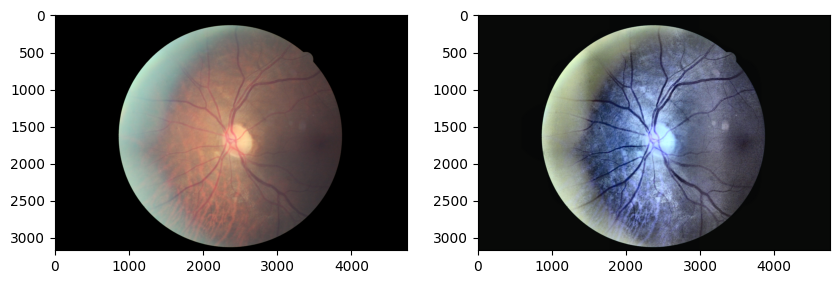

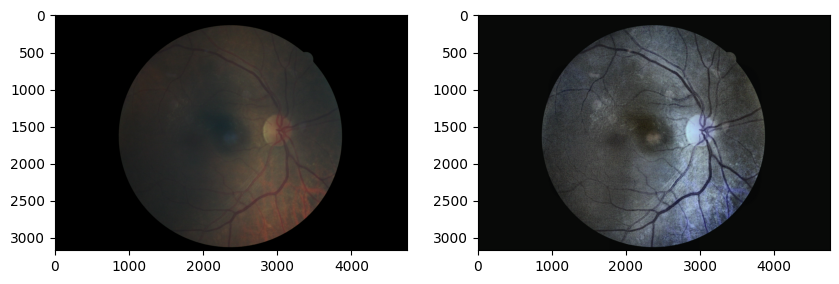

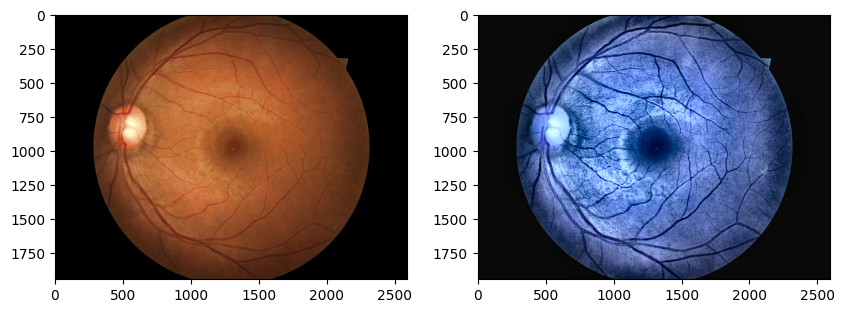

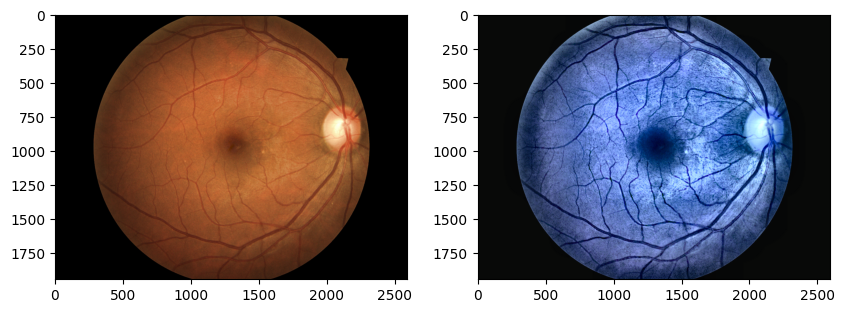

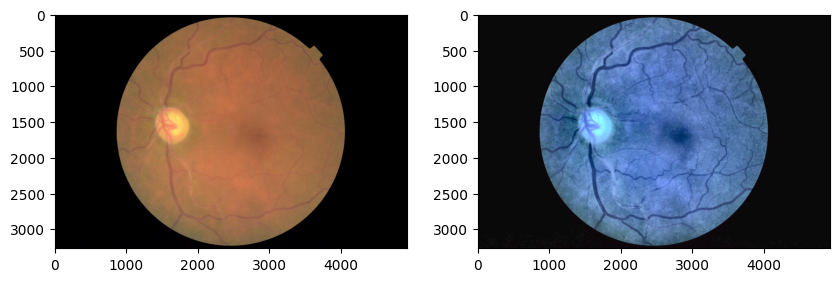

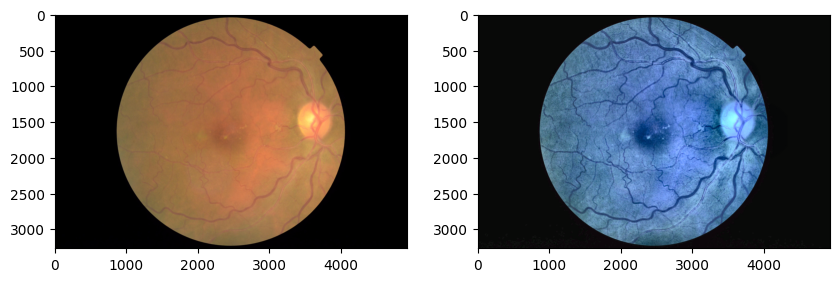

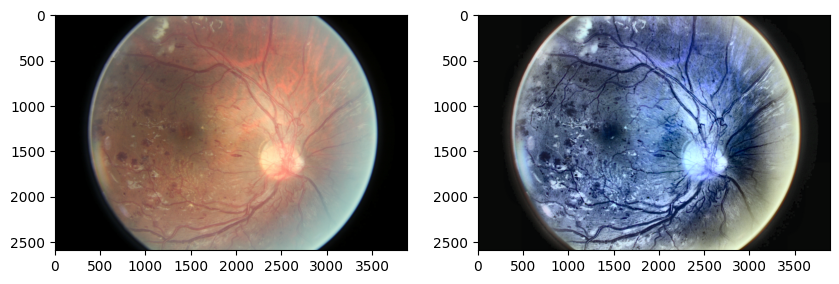

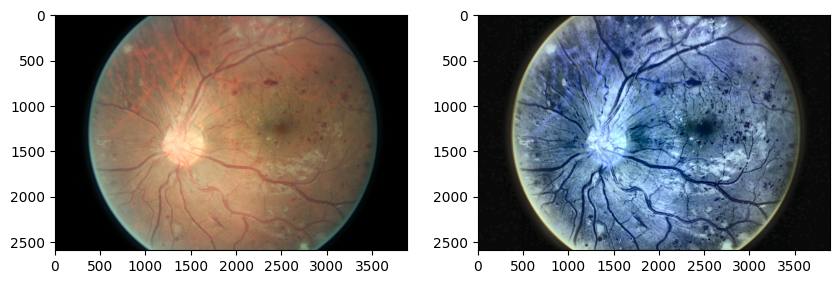

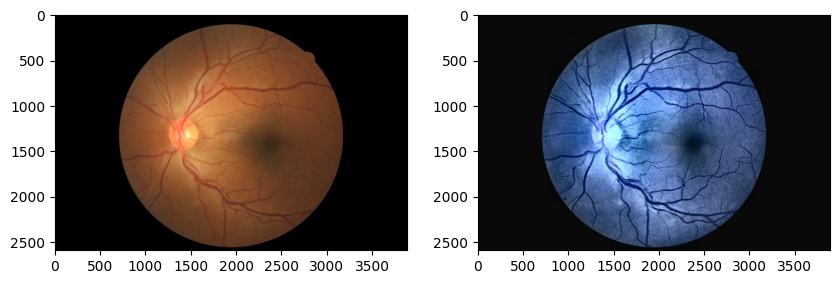

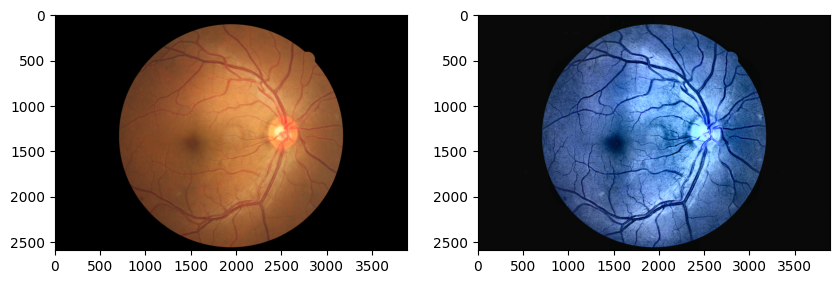

In [36]:
def enhanceImageMethod5(img):

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    blurred_gray = cv2.GaussianBlur(gray, (5, 5), 0)
    binary = cv2.threshold(blurred_gray, 10, 255, cv2.THRESH_BINARY)[1]

    contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
    contours = contours[:, 0, :]

    lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    clahe_l_channel = clahe.apply(l_channel)
    clahe_l_channel_merged = cv2.merge((clahe_l_channel, a_channel, b_channel))

    enhanced = cv2.cvtColor(clahe_l_channel_merged, cv2.COLOR_LAB2RGB)
    median_enhanced = cv2.medianBlur(enhanced, 3)
    background = cv2.medianBlur(enhanced, 37)
    mask = cv2.addWeighted(median_enhanced, 1, background, -1, 255)
    final_image = cv2.bitwise_and(mask, median_enhanced)

    return final_image

for image_path in image_paths:
    img = cv2.imread(image_path)
    
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    enhanced_image = enhanceImageMethod5(img)

    ssim_score, psnr = evaluateEnhancement(original_image, enhanced_image)
    plotImages([original_image, enhanced_image])
    print(f"SSIM Score: {ssim_score}")
    print(f"PSNR: {psnr}")

`enhanceImageMethod5` function:

1. `cv2.cvtColor()` function is used to convert the input image from RGB color space to grayscale. The `cv2.COLOR_RGB2GRAY` parameter specifies the conversion type.

2. `cv2.GaussianBlur()` function is used to apply a Gaussian blur to the grayscale image. The `(5, 5)` parameter specifies the kernel size of the Gaussian filter, and the `0` parameter specifies the sigma value.
    - The kernel size refers to the size of the Gaussian kernel used to blur the image. The kernel is a square matrix of values, and the kernel size specifies the width and height of the matrix. A larger kernel size results in more blurring, while a smaller kernel size results in less blurring.

    - The sigma value, also known as the standard deviation, determines the spread of the Gaussian distribution used to generate the kernel. A larger sigma value results in a wider distribution and more blurring, while a smaller sigma value results in a narrower distribution and less blurring.

3. `cv2.threshold()` function is used to apply thresholding to the blurred image. The `10` parameter specifies the threshold value, the `255` parameter specifies the maximum value, and the `cv2.THRESH_BINARY` parameter specifies the thresholding type.
    - `cv2.THRESH_BINARY` is used as the thresholding type in the `cv2.threshold()` function. This means that all pixels in the blurred image with intensity values below the threshold value of 10 are set to 0, while all pixels with intensity values above 10 are set to 255, creating a binary image.

4. `cv2.findContours()` function is used to find the contours in the binary image. The `cv2.RETR_EXTERNAL` parameter specifies the retrieval mode, and the `cv2.CHAIN_APPROX_SIMPLE` parameter specifies the contour approximation method.
    - `cv2.RETR_EXTERNAL` is a retrieval mode that retrieves only the external contours of an object in the image. This means that only the outermost contours of an object are returned, and any contours inside the object are ignored. This is useful when we only want to detect the boundaries of an object in the image.

    - `cv2.CHAIN_APPROX_SIMPLE` is a contour approximation method that compresses the contour by removing any redundant points. This means that only the endpoints of the contour are retained, which reduces the memory required to store the contour. This is useful when we want to simplify the contour and reduce the number of points required to represent it.

5. `cv2.cvtColor()` function is used to convert the input image from RGB color space to LAB color space. The `cv2.COLOR_RGB2LAB` parameter specifies the conversion type.
    - LAB color space is a color model used in image processing that separates color information into three channels: L (lightness), A (green-red), and B (blue-yellow). The L channel represents the brightness of the image, while the A and B channels represent the color information.
    
6. `cv2.split()` function is used to split the LAB image into its three channels (L, A, and B).

7. `cv2.createCLAHE()` function is used to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the L channel. The `clipLimit` parameter specifies the clip limit, and the `tileGridSize` parameter specifies the size of the tile grid.
    - The `clipLimit` parameter in `cv2.createCLAHE()` specifies the contrast limit for the CLAHE algorithm. This parameter limits the amount of contrast enhancement that can be applied to the image. A higher value of `clipLimit` results in more contrast enhancement, while a lower value results in less contrast enhancement. In the code provided, `clipLimit` is set to 5.0, which means that the contrast enhancement is limited to a maximum of 5.0.

    - The `tileGridSize` parameter in `cv2.createCLAHE()` specifies the size of the grid used to divide the image into smaller regions for local contrast enhancement. The image is divided into a grid of tiles, and the contrast enhancement is applied to each tile individually. A larger `tileGridSize` results in larger tiles and more global contrast enhancement, while a smaller `tileGridSize` results in smaller tiles and more local contrast enhancement. In the code provided, `tileGridSize` is set to (8, 8), which means that the image is divided into a grid of 8x8 tiles for local contrast enhancement.

8. `cv2.merge()` function is used to merge the enhanced L channel with the A and B channels.

9. `cv2.cvtColor()` function is used to convert the enhanced LAB image back to RGB color space. The `cv2.COLOR_LAB2RGB` parameter specifies the conversion type.

10. `cv2.medianBlur()` function is used to apply median blur to the enhanced image. The `3` parameter specifies the kernel size.
    - `cv2.medianBlur()` is a function in OpenCV that is used to apply median filtering to an image. Median filtering is a type of non-linear filtering that is used to remove noise from an image. In the code provided, a kernel size of 3 is used, which means that a 3x3 kernel is used for median filtering. This removes any remaining noise in the image after the previous steps of the `enhanceImageMethod5` function, resulting in a smoother and cleaner image. 
    
11. `cv2.medianBlur()` function is used to apply median blur to a background version of the enhanced image. The `37` parameter specifies the kernel size.

12. `cv2.addWeighted()` function is used to create a mask to subtract the background from the enhanced image. The `1` parameter specifies the weight of the enhanced image, the `-1` parameter specifies the weight of the background image, and the `255` parameter specifies the scalar value added to each pixel in the mask.
    - `cv2.addWeighted()` is a function in OpenCV that is used to blend two images together. In the code you provided, `cv2.addWeighted(median_enhanced, 1, background, -1, 255)` is used to create a mask that will be used to subtract the background from the enhanced image. The `1` parameter in `cv2.addWeighted()` specifies the weight of the `median_enhanced` image, and the `-1` parameter specifies the weight of the `background` image. The `255` parameter specifies a scalar value that is added to each pixel in the mask. The resulting mask is a grayscale image where the foreground (the object in the image) is represented by white pixels, and the background is represented by black pixels. The mask is then applied to the enhanced image using the `cv2.bitwise_and()` function to remove the background from the image, leaving only the foreground.
    
13. `cv2.bitwise_and()` function is used to apply the mask to the enhanced image. This removes the background from the enhanced image, leaving only the foreground.
    - `cv2.bitwise_and()` is a function in OpenCV that is used to perform a bitwise AND operation between two images. In the code you provided, `cv2.bitwise_and(mask, median_enhanced)` is used to apply a mask to the enhanced image, removing the background and leaving only the foreground object. The `mask` parameter is a binary image that was generated using `cv2.addWeighted()` function in the previous step of the `enhanceImageMethod5` function. The `median_enhanced` parameter is the enhanced image that was generated in the previous steps of the function. The `cv2.bitwise_and()` function performs a bitwise AND operation between the corresponding pixels in the `mask` and `median_enhanced` images. If the pixel in the `mask` image is white (255), the corresponding pixel in the `median_enhanced` image is retained. If the pixel in the `mask` image is black (0), the corresponding pixel in the `median_enhanced` image is set to black. The resulting image is an image where the background has been removed, leaving only the foreground object.